<a href="https://colab.research.google.com/github/gsantosgithub/aulaPhyton2/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
#from sklearn.tree import export_graphviz
#import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
base = pd.read_csv('insurance.csv')
base

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,Vazio,Football,Vazio,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,Vazio,Football,Vazio,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,Vazio,EggShell,Vazio,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,Vazio,Tank,Vazio,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,Vazio,Football,Vazio,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,Vazio,Football,Vazio,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [3]:
base = base.drop(columns=['Unnamed: 0'])
base

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,Vazio,Football,Vazio,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,Vazio,Football,Vazio,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,Vazio,EggShell,Vazio,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,Vazio,Tank,Vazio,FamilySedan,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,Vazio,Football,Vazio,Luxury,Excellent,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,Vazio,Football,Vazio,FamilySedan,Excellent,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [4]:
base.shape


(20000, 27)

In [5]:
y = base.iloc[:,7].values
X = base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values

In [6]:
labelEncoder = LabelEncoder()


In [7]:
for i in range(X.shape[1]):
  if X[:,i].dtype == 'object':
    X[:,i] = labelEncoder.fit_transform(X[:,i])

In [8]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
#94
#modelo = RandomForestClassifier(random_state=1, n_estimators=500)

#93
modelo = RandomForestClassifier(random_state=1, n_estimators=500, max_depth=20, max_leaf_nodes=12)
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier(max_depth=20, max_leaf_nodes=12, n_estimators=500,
                       random_state=1)

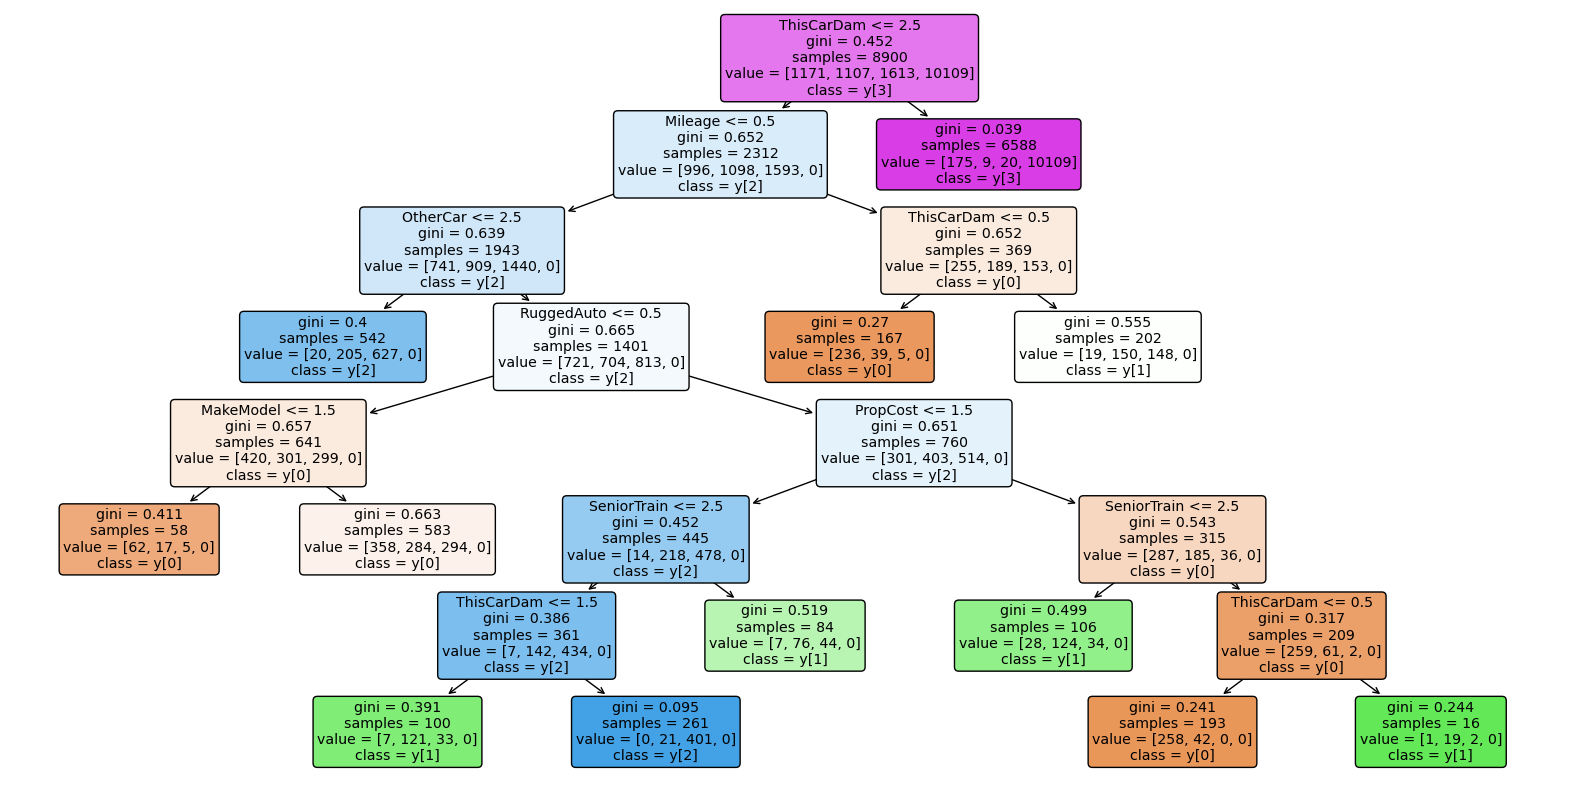

In [23]:
tree_index=0
tree_to_visualize = modelo.estimators_[tree_index]
plt.figure(figsize=(20,10))
plot_tree(tree_to_visualize, filled=True, feature_names=base.columns[:-1], class_names=True, rounded=True)
plt.show()

In [21]:
previsoes = modelo.predict(X_teste)

In [22]:
accuracy = accuracy_score(y_teste, previsoes)
precision=precision_score(y_teste, previsoes, average='weighted')
recall=recall_score(y_teste, previsoes, average='weighted')
f1=f1_score(y_teste, previsoes, average='weighted')

print(f'Acuracia: {accuracy}, Precisao: {precision}, Recall: {recall}, F1: {f1}')

Acuracia: 0.9388333333333333, Precisao: 0.9357487660759801, Recall: 0.9388333333333333, F1: 0.9360987546302164
